# Part II - (Presentation Title)
## by (Adedoyin Elizabeth Oyekanmi)

## Investigation Overview


> The goal here is to share the key insights about the data used for visualization.

>The most trips lies below 5,000 duration_sec while higher duration_sec are few.

>Customer user_type are fewer than subsriber use_type

>Evening trips are the highest trips taken

>Customer user_type trips had higher duration_sec throughout the weekdays compared to Subcriber

>Evening trips had highest duration_sec compared to the trips taken in other periods

>Evening trips are more on weekdays compare to Saturday and Sunday

>Early morning trips has the highest duration_sec on Sunday. On weekdays except Saturday and Sunday, early morning trips have the least duration_sec.

>On Sunday, customer user_type have the highest duration_sec followed by Saturday.

>Customer have more duration_sec compared to subscriber across the weekday, noting that duration_sec for most trips are less than 5,000duration_sec

>Early morning trips are more on Saturday and Sunday

Note:I expect to have more subscriber duration_sec across the weekdays and periods, but visualization helped to tell that even if subscribers were more than customer user_type. Customer user_type take longer bike trips.


## Dataset Overview

> his data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area called '201902-fordgobike-tripdata'.

>The data has 183412 individual rides in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Nine columns are numeric in nature while the variable columns include; start_station_name, end_station_name, member_gender, user_type, bike_share_for_all_trip which are nominal variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_new = pd.read_csv('df_new.csv')

In [3]:

df_new.head()

duration_sec               start_time                 end_time  \
0         52185  2019-02-28 17:32:10.145  2019-03-01 08:01:55.975   
1         42521  2019-02-28 18:53:21.789  2019-03-01 06:42:03.056   
2         61854  2019-02-28 12:13:13.218  2019-03-01 05:24:08.146   
3         36490  2019-02-28 17:54:26.010  2019-03-01 04:02:36.842   
4          1585  2019-02-28 23:54:18.549  2019-03-01 00:20:44.074   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  ...  \
0                Commercial St at Montgomery St             37.794231  ...   
1                            Berry St at 4th St             37.775880  ...   
2  Powell St BART Station (Market St at 4th St)             37.786375  ...   
3                        Central Ave at Fell St             37.773311  ...   
4                         10th Ave at E 15th St             37.792714  ...   

    user_type  member_birth_year member_gender  bike_share_for_all_trip  Year  \
0    Customer               1984          Male                       No  2019   
1    Customer               1988          Male                       No  2019   
2    Customer               1972          Male                       No  2019   
3  Subscriber               1989         Other                       No  2019   
4  Subscriber               1974          Male                      Yes  2019   

  Month   weekday             time hour  periods  
0     2  Thursday  17:32:10.145000   17  Evening  
1     2  Thursday  18:53:21.789000   18  Evening  
2     2  Thursday  12:13:13.218000   12     Noon  
3     2  Thursday  17:54:26.010000   17  Evening  
4     2  Thursday  23:54:18.549000   23    Night  

[5 rows x 22 columns]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

### Distribution of duration_sec

>Very few trips have long time duration. Most of the trips duration lies below 5,000 duration_sec. In order to view the distribution properly, I have change the limits of the duration_sec and scaled to logarithm. The graph is unimodal.


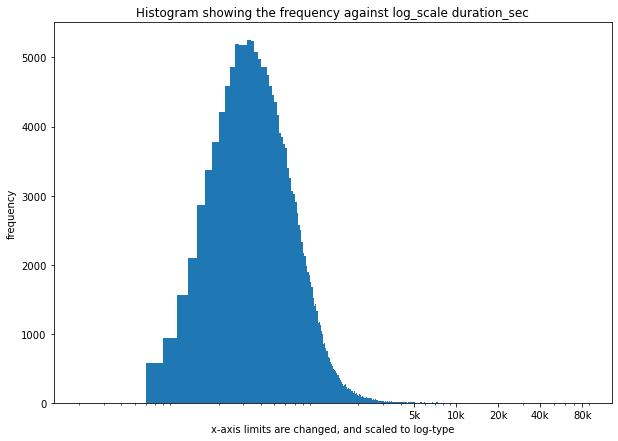

In [4]:
# the plot below shows the distribution of the duration_sec of trips
plt.figure(figsize = [10, 7]) 
bins =20
bins = np.arange(0, df_new['duration_sec'].max()+bins, bins)
plt.hist(data = df_new, x = 'duration_sec', bins = bins)

plt.xscale('log')
plt.xticks([5e3, 1e4, 2e4, 4e4, 8e4], ['5k', '10k', '20k', '40k', '80k'])
plt.xlabel('x-axis limits are changed, and scaled to log-type')
plt.ylabel('frequency')
plt.title('Histogram showing the frequency against log_scale duration_sec');

### Distribution of user_type column
>There are more subcribers than customers in the data given

In [5]:
#the counplot here is used to count and plot the number of each user_type
def countplot(data, x, diagram_title):
    "A function that plot histogram with seaborn's countplot"
    color = sb.color_palette()[0]
    sb.countplot(data=data, x=x, color=color)
    plt.xticks(rotation=90)
    plt.xlabel(x)
    plt.title(diagram_title)
    plt.show()
countplot(df_new,'user_type','Barchart representing user_type column')

### Distribution of Periods
>Most of the trips were evening trips, followed by the Morning trips. The late Night trips were the least.

In [6]:
# the periods column consist of categorized time frame of a day and plotted using countplot to know the period with the highest count
countplot(df_new, 'periods', 'The graph shows the periods bike trips was taken ')

### Duration_sec vs. User_type

> The median of the duration_sec for customer is higher than that of subcriber. Customer took long bike trips than subscriber.

In [7]:
# Here I compared user_type and duration column
color = sb.color_palette()[0]
sb.boxplot(data=df_new, y='duration_sec', x='user_type', color=color)
plt.yscale('log')
plt.title('This represents the graph of Duration_sec against user_type')
plt.yticks([1e4, 2e4, 4e4, 8e4], [ '10k', '20k', '40k', '80k']);

### Duration_sec vs. Periods
>From the graph above, trips taken in the evenings has longer duration_sec compared to trips taken late Night. The trips taken in the morning has the second best duration_sec.

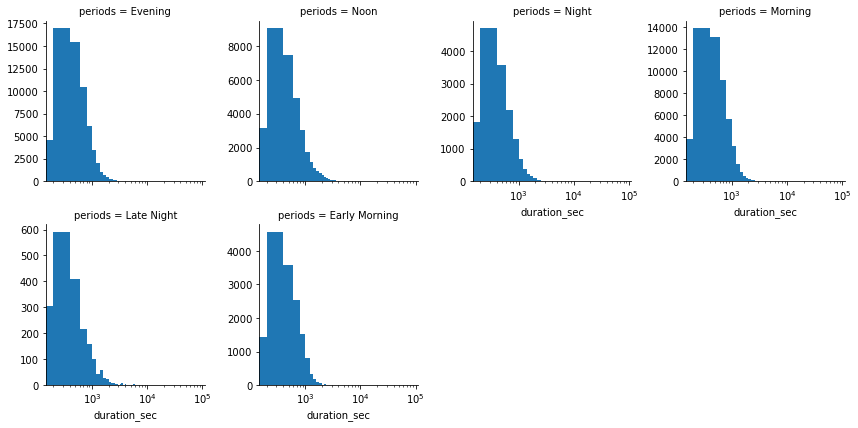

In [8]:
# I used a facetgrid plot to check the duration_sec across the periods
bin_edges = np.arange(0, 81800+200, 200)
g = sb.FacetGrid(data = df_new, col = 'periods', col_wrap=4, sharey=False)
g.map(plt.hist, 'duration_sec', bins = bin_edges)
plt.xscale('log');

### Weekday vs. Periods
>Late Night trips are the lowest across the weekdays except on Saturday and Sunday. Morning and evening trips are higher on weekdays except Saturday and Sunday. There are less trips on Saturday and Sunday with noon having the highest number of trips.

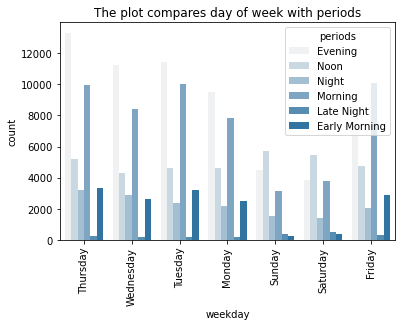

In [9]:
# I checked the relationship between the weekday and periods bike trips were taken using countplot
def countplotb(data, x, hue, diagram_title):
    "A function that plot a clustered barchart with seaborn's countplot"
    color = sb.color_palette()[0]
    sb.countplot(data=data, x=x, color=color, hue =hue)
    plt.xticks(rotation=90)
    plt.xlabel(x)
    plt.title(diagram_title)
    plt.show()
countplotb(df_new, 'weekday', 'periods', 'The plot compares day of week with periods');

### Duration_sec by Weekday for User_type
>Customer have more duration_sec compared to subscriber across the weekday. On Monday, Sunday, Saturday and Friday subscriber fall below the median duration_sec of customer. On Sunday, customer have the highest duration_sec followed by Saturday. Only on Saturday and Sunday the subscriber have duration_sec far lower than the customer.



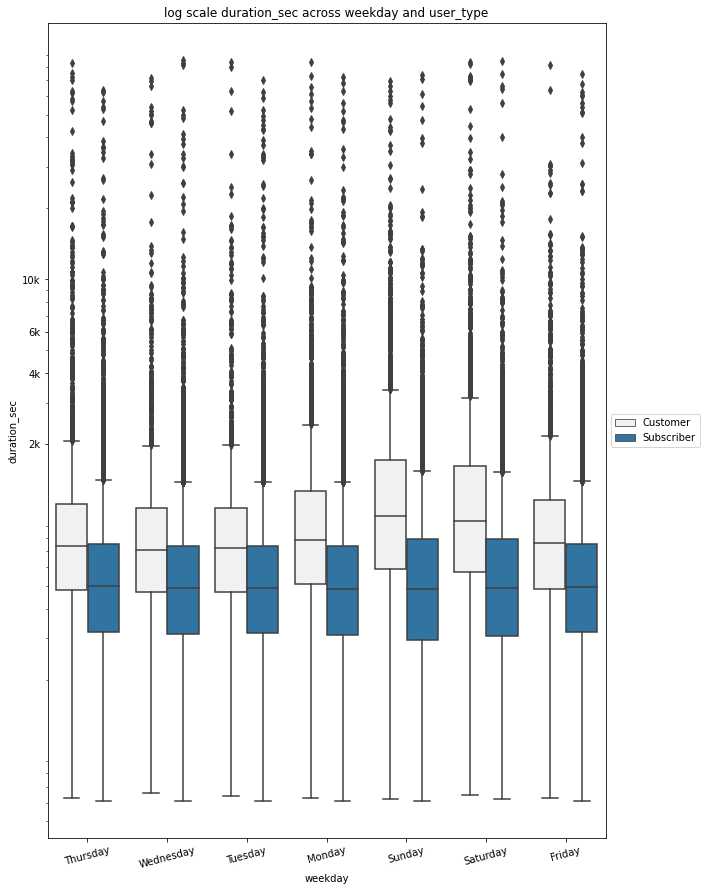

In [10]:
# using a boxplot to know how user_type vary when duration_sec is plotted against weekday 
def boxplot(data, x, y, hue, diagram_title):
    "A function that plot a boxplot with seaborn's boxplot"
    color = sb.color_palette()[0]
    sb.boxplot(data=data, x=x, y=y , color=color, hue =hue)
    plt.xticks(rotation = 15)
    plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))
    plt.xlabel(x)
    plt.yscale('log')
    plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
    plt.title(diagram_title)
    plt.show()

plt.figure(figsize=[10, 15])
boxplot(df_new, 'weekday', 'duration_sec', 'user_type','log scale duration_sec across weekday and user_type');

### Duration_sec by Weekday on periods
Early morning trips are has the highest duration_sec on Sunday. On weekdays except Saturday and Sunday, early morning trips have the least duration_sec. Across the weekdays, late Night trips have more duration_sec if summed up compare to other periods.

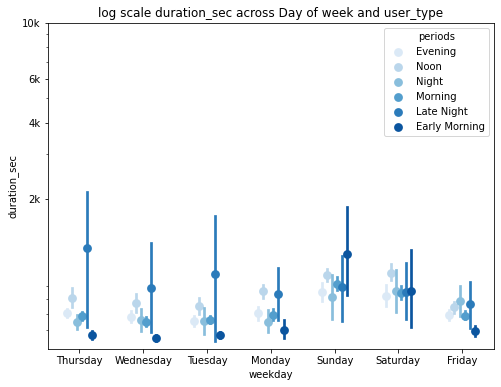

In [11]:
# using a pointplot to know how periods vary when duration_sec is plotted against weekday 
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_new, x = 'weekday', y = 'duration_sec', hue = 'periods',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('log scale duration_sec across Day of week and user_type')
plt.ylabel('duration_sec')
plt.yscale('log')
plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
plt.show();

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 